Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

# Set all options
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

**User Defined Functions

In [2]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sub = pd.read_csv("SampleSubmission.csv")

In [4]:
print("Shape of train =", train.shape)
print("Shape of test = ", test.shape)
print("Shape of Sample Submission =", sub.shape)

Shape of train = (56000, 52)
Shape of test =  (24000, 51)
Shape of Sample Submission = (24000, 2)


In [5]:
train.head(4)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,"3,436.0000",0.2851,1.6560,0.0000,0.0000,0.0000,"10,689,720.0000","252,072.0000","4,272,776.0000","11,333,126.0000","4,397,256.0000","2,301,324.0000","7,875,694.0000",96375139,"112,181,765.0000",1.0000,1.0000,1.0000,3.0000,3.0000,134.6550,nan,nan,134.6550,"4,000.5000","17,064.0000","11,376.0000",60.0000,"17,064.0000","5,962.0000",nan,"1,052.0000",8.0000,2.0000,nan,12.0000,12.0000,4.0000,0.0000,nan,nan,0.3929,2.0200,0.7116,0.0000,0.0000,charge,nan,1.1295,0.0443,no
1,Apcnt_1000004,"3,456.0000",0.6740,0.2342,0.0000,0.0000,0.0000,"898,979.0000","497,531.0000","9,073,814.0000","2,533,168.0000","244,292.0000","3,982,971.0000","2,141,445.0000",28141427,"45,169,902.0000",1.0000,1.0000,1.0000,2.0000,2.0000,109.2300,"11,385.2400","14,584.2900",86.6850,"4,161.0000","13,413.0000","8,942.0000",304.0000,"13,413.0000","5,780.0000",nan,"2,554.0000",17.5000,0.0000,0.0000,16.0000,24.0000,8.0000,0.0000,nan,nan,0.3143,8.0800,0.1836,nan,0.0000,charge,349.8057,1.6205,0.3224,no
2,Apcnt_1000008,"3,276.0000",0.5384,3.1510,0.0000,6.2820,nan,"956,940.0000",nan,"192,944.0000","1,079,864.0000",nan,nan,0.0000,16576457,"22,452,691.0000",nan,nan,nan,0.0000,0.0000,nan,nan,nan,nan,"1,597.5000","4,746.0000","3,164.0000",60.0000,"15,696.0000",nan,"14,508.0000",70.0000,0.6666,0.0000,nan,12.0000,0.0000,6.0000,0.0000,149.6805,nan,0.1630,18.1800,0.7911,0.0000,0.0000,charge,nan,1.5134,0.0116,yes
3,Apcnt_1000012,"3,372.0000",0.1701,0.5050,0.0000,0.0000,"192,166.0000","3,044,703.0000","385,499.0000","3,986,472.0000","3,621,979.0000",nan,"771,776.0000","1,186,839.0000",48187375,"136,297,820.0000",0.0000,0.0000,0.0000,1.0000,1.0000,120.1200,"8,580.0000",0.0000,85.8000,"1,701.0000","4,014.0000","2,676.0000",60.0000,"11,679.0000",nan,nan,522.0000,7.8334,1.0000,1.0000,4.0000,8.0000,4.0000,1.0000,nan,nan,0.4889,2.0200,0.6852,nan,0.0000,charge,89.9401,0.6645,0.0827,no


no     42285
yes    13715
Name: default_status, dtype: int64


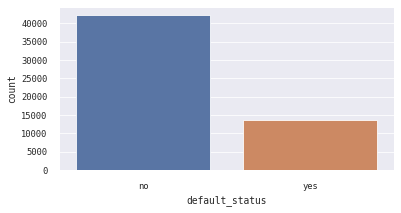

In [6]:
plt.figure(figsize =(6,3))
sns.countplot(x="default_status",data=train)
print(train.default_status.value_counts())
plt.show()

In [7]:
train["default_status"].value_counts(normalize = True) *100

no                 75.5089
yes                24.4911
Name: default_status, dtype: float64

In [8]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,"53,471.0000","52,156.0000","55,645.0000","55,645.0000","55,645.0000","42,640.0000","50,837.0000","42,640.0000","47,992.0000","55,645.0000","24,579.0000","46,105.0000","50,111.0000","56,000.0000","33,525.0000","42,964.0000","44,849.0000","45,598.0000","55,996.0000","55,645.0000","40,146.0000","35,600.0000","27,877.0000","42,703.0000","50,550.0000","48,562.0000","46,701.0000","55,645.0000","55,645.0000","30,491.0000","16,592.0000","50,550.0000","54,744.0000","55,645.0000","32,852.0000","54,005.0000","50,550.0000","55,645.0000","51,789.0000","12,271.0000","17,771.0000","54,677.0000","55,432.0000","50,617.0000","24,683.0000","40,096.0000","35,111.0000","55,645.0000","44,944.0000"
mean,"3,491.7957",0.5507,1.0522,0.8520,1.9563,"624,447.9244","6,865,210.3847","2,626,690.1776","13,160,015.4373","11,855,849.9738","2,054,714.7603","2,771,112.6303","6,009,944.1236","69,148,750.4968","114,504,142.6083",0.2304,0.2657,0.2718,0.9488,1.0316,86.5004,"6,628.3164","6,452.8751",104.5585,"2,624.5559","10,106.5549","6,190.5169","17,274.3151","16,518.5407","5,213.2467","10,857.5658",938.3453,13.9266,0.2302,0.1999,12.8591,8.4804,8.6014,0.0908,147.7980,108.1174,0.3682,6.6345,0.5634,0.0725,0.0954,"305,244.9328",1.0491,"600,586.1729"
std,188.4624,0.8210,2.1478,3.1577,10.5124,"1,433,421.5447","19,127,287.2822","3,927,354.7528","19,779,632.5497","26,694,592.8838","4,912,980.2014","4,544,838.3010","23,358,934.0839","2,713,995,026.8743","115,384,236.0283",0.6218,0.7202,0.7254,1.7365,1.7851,53.4455,"5,661.0593","5,739.9688",436.6707,"1,964.2265","8,796.4725","5,390.9153","26,930.7420","9,666.1840","3,124.4915","6,049.6785","1,044.5970",15.2084,0.6831,0.5740,10.6220,9.3288,7.9692,0.4238,45.0859,36.7658,0.4129,6.3789,0.1970,0.2911,0.3352,"1,647,757.4141",1.8062,"5,842,404.6322"
min,"2,990.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,"539,543.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.2550,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1666,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0210,0.0000,0.0000,0.0000,0.0485,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"3,358.0000",0.0708,0.0000,0.0000,0.0000,"14,004.0000","686,974.0000","192,944.0000","1,368,502.0000","450,073.0000","217,256.5000","275,801.0000","192,166.0000","16,576,457.0000","50,076,359.0000",0.0000,0.0000,0.0000,0.0000,0.0000,40.3050,"1,068.6675",797.1450,14.8650,"1,231.5000","3,375.0000","2,068.0000",60.0000,"9,765.0000","2,312.0000","6,297.0000",194.0000,2.3334,0.0000,0.0000,6.0000,2.0000,4.0000,0.0000,136.1918,87.0555,0.0000,2.0200,0.4117,0.0000,0.0000,77.1008,0.0000,0.0456
50%,"3,484.0000",0.2676,0.0620,0.0000,0.0000,"115,533.0000","2,704,328.0000","963,942.0000","5,506,295.0000","3,707,559.0000","698,644.0000","1,163,110.0000","1,605,792.0000","28,141,427.0000","84,424,281.0000",0.0000,0.0000,0.0000,0.0000,0.0000,89.1675,"5,976.2250","5,548.9350",60.6600,"2,203.5000","8,214.0000","5,110.0000",486.0000,"15,057.0000","5,658.0000","10,584.0000",598.0000,7.8334,0.0000,0.0000,10.0000,6.0000,6.0000,0.0000,150.0000,118.4415,0.2200,5.0500,0.5886,0.0000,0.0000,318.1243,0.0000,0.1704
75%,"3,620.0000",0.7195,1.2820,0.0000,0.0000,"525,928.0000","6,993,831.0000","3,751,516.0000","16,945,520.7500","13,261,010.0000","1,964,839.0000","3,360,182.0000","5,593,625.5000","48,187,375.0000","142,873,476.0000",0.000

In [9]:
#missing values

#train.isnull().sum()

In [10]:
quality_report(train)

,Total,Percent,Nunique,Dtype
form_field40,43729,78.0875,9848,float64
form_field31,39408,70.3714,394,float64
form_field41,38229,68.2661,14375,float64
form_field11,31421,56.1089,9508,float64
form_field45,31317,55.9232,6,float64
form_field23,28123,50.2196,16619,float64
form_field30,25509,45.5518,274,float64
form_field35,23148,41.3357,11,float64
form_field15,22475,40.1339,23783,float64
form_field48,20889,37.3018,32115,float64


In [11]:
#Drop fields with more than 50% missing values
train.drop(['form_field40','form_field31','form_field41','form_field11','form_field45','form_field23'], axis = 1, inplace=True)
test.drop(['form_field40','form_field31','form_field41','form_field11','form_field45','form_field23'], axis = 1, inplace=True)

In [12]:
#test["default_status"] = "test" #for easy separation
#combine train and test to avoid repitition 
#data = pd.concat([train, test]).reset_index(drop=True)

In [13]:
#data.shape,train.shape,test.shape

In [14]:
#missing_col = data.columns[data.isna().any()]
#missing_col

In [15]:
#for col in missing_col :
 #   data[col].fillna(data[col].median(), inplace=True)

In [16]:
#data.isna().sum()

In [17]:
#data[:20]

In [18]:
#plt.figure(figsize =(20,30))
#sns.countplot(x="form_field1",data=train)
#plt.show()

In [19]:
dict_ = {'charge': 1,
        'lending': 0}
target_map = {'yes' : 1,
             'no' : 0}
train.default_status.replace(target_map, inplace = True)

train['form_field47'].replace(dict_, inplace = True)
test['form_field47'].replace(dict_, inplace = True)

In [21]:
pip install catboost

     |████████████████████████████████| 11.4 MB 94 kB/s eta 0:00:012
     |████████████████████████████████| 13.0 MB 121 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=4b5df351124ab7d22a7d6748fe140fee77c08a31d3ab0567438487cb3e482884
  Stored in directory: /Users/user/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [23]:
features = train.select_dtypes(exclude = object).columns.drop(['default_status'])

In [24]:
for col in features:
    train[col].fillna(-999, inplace = True)
    test[col].fillna(-999, inplace = True)

In [25]:
X = train[features]
y = train['default_status']

In [26]:
from sklearn.model_selection import StratifiedKFold

In [27]:
def metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [28]:
# Specify number of folds
n_skf = 15
kf = StratifiedKFold(n_skf)


seed = 1020


params = {
    'n_estimators': 4000,
    'learning_rate': 0.01,
    'max_depth': 8,
    'objective': 'CrossEntropy',
      'eval_metric':'AUC',
    'random_seed': seed,
    'early_stopping_rounds': 200,
    'use_best_model': True,
}

In [29]:
score_list = []
score = 0
test_oofs = []

for i, (tr_idx, vr_idx) in enumerate(kf.split(X, y)):
    
    xtrain, ytrain = X.loc[tr_idx, features], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features], y.loc[vr_idx]

    model = CatBoostClassifier(**params)
    model.fit(xtrain, ytrain, eval_set=[(xval,yval)], verbose=100)
    
    p = model.predict_proba(xval)[:, 1]
    sc = metric(yval, p)
    score_list.append(sc)
    score += sc/n_skf
    
    pred = model.predict_proba(test[features])[:, 1]
    test_oofs.append(pred)

    print('Fold {} : {}'.format(i, sc))

print()
print()
print('Avg log : ', score)

0:	test: 0.7915038	best: 0.7915038 (0)	total: 120ms	remaining: 7m 59s
100:	test: 0.8175354	best: 0.8175354 (100)	total: 4s	remaining: 2m 34s
200:	test: 0.8209492	best: 0.8209492 (200)	total: 7.99s	remaining: 2m 30s
300:	test: 0.8233249	best: 0.8233249 (300)	total: 11.8s	remaining: 2m 24s
400:	test: 0.8250219	best: 0.8250219 (400)	total: 15.3s	remaining: 2m 17s
500:	test: 0.8262563	best: 0.8262563 (500)	total: 18.8s	remaining: 2m 11s
600:	test: 0.8273402	best: 0.8273402 (600)	total: 22.5s	remaining: 2m 7s
700:	test: 0.8281656	best: 0.8281974 (698)	total: 26.4s	remaining: 2m 4s
800:	test: 0.8287600	best: 0.8287600 (800)	total: 29.9s	remaining: 1m 59s
900:	test: 0.8292333	best: 0.8292643 (893)	total: 33.7s	remaining: 1m 55s
1000:	test: 0.8295819	best: 0.8296140 (999)	total: 37.4s	remaining: 1m 52s
1100:	test: 0.8299502	best: 0.8299711 (1098)	total: 41.6s	remaining: 1m 49s
1200:	test: 0.8303324	best: 0.8303332 (1186)	total: 45.1s	remaining: 1m 45s
1300:	test: 0.8307837	best: 0.8308085 (129

300:	test: 0.8365899	best: 0.8365899 (300)	total: 11.5s	remaining: 2m 20s
400:	test: 0.8381035	best: 0.8381035 (400)	total: 15.8s	remaining: 2m 21s
500:	test: 0.8394538	best: 0.8395003 (498)	total: 20.4s	remaining: 2m 22s
600:	test: 0.8403204	best: 0.8403352 (597)	total: 24s	remaining: 2m 15s
700:	test: 0.8410194	best: 0.8410194 (700)	total: 27.6s	remaining: 2m 9s
800:	test: 0.8415453	best: 0.8415612 (799)	total: 31.2s	remaining: 2m 4s
900:	test: 0.8419963	best: 0.8420432 (889)	total: 34.9s	remaining: 1m 59s
1000:	test: 0.8426929	best: 0.8426972 (999)	total: 38.9s	remaining: 1m 56s
1100:	test: 0.8429402	best: 0.8429561 (1093)	total: 43s	remaining: 1m 53s
1200:	test: 0.8436722	best: 0.8436722 (1200)	total: 46.9s	remaining: 1m 49s
1300:	test: 0.8440983	best: 0.8441119 (1298)	total: 51s	remaining: 1m 45s
1400:	test: 0.8444069	best: 0.8444301 (1397)	total: 55.4s	remaining: 1m 42s
1500:	test: 0.8445241	best: 0.8445330 (1494)	total: 59.2s	remaining: 1m 38s
1600:	test: 0.8446199	best: 0.84462

600:	test: 0.8177617	best: 0.8177726 (599)	total: 23.3s	remaining: 2m 11s
700:	test: 0.8184879	best: 0.8184879 (700)	total: 27s	remaining: 2m 6s
800:	test: 0.8188201	best: 0.8188201 (800)	total: 31.5s	remaining: 2m 5s
900:	test: 0.8192552	best: 0.8192680 (899)	total: 36s	remaining: 2m 3s
1000:	test: 0.8196716	best: 0.8196906 (997)	total: 39.9s	remaining: 1m 59s
1100:	test: 0.8201176	best: 0.8201447 (1097)	total: 43.5s	remaining: 1m 54s
1200:	test: 0.8204086	best: 0.8204249 (1191)	total: 47s	remaining: 1m 49s
1300:	test: 0.8204952	best: 0.8205255 (1282)	total: 50.8s	remaining: 1m 45s
1400:	test: 0.8205697	best: 0.8205798 (1390)	total: 54.3s	remaining: 1m 40s
1500:	test: 0.8208181	best: 0.8208297 (1492)	total: 57.8s	remaining: 1m 36s
1600:	test: 0.8209423	best: 0.8209423 (1600)	total: 1m 1s	remaining: 1m 31s
1700:	test: 0.8210568	best: 0.8210591 (1685)	total: 1m 5s	remaining: 1m 28s
1800:	test: 0.8210867	best: 0.8211464 (1735)	total: 1m 10s	remaining: 1m 25s
1900:	test: 0.8208930	best: 0

In [30]:
sub[:5]

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [31]:

sub = pd.DataFrame({'Applicant_ID':test['Applicant_ID'], 'default_status':pred})
sub.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.3377
1,Apcnt_1000048,0.3156
2,Apcnt_1000052,0.3959
3,Apcnt_1000076,0.7528
4,Apcnt_1000080,0.1839


In [33]:
filename = 'DSN Hackathon.csv'
sub.to_csv(filename,index=False)
print('Saved File :' + filename)

Saved File :DSN Hackathon.csv
